In [1]:
%cd "/content/drive/MyDrive/직무부트캠프"

/content/drive/MyDrive/직무부트캠프


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
source_df = pd.read_csv('4th_data(source).csv')

In [4]:
source_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13262 entries, 0 to 13261
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseID               13262 non-null  int64  
 1   taskID               13262 non-null  object 
 2   originator           13262 non-null  object 
 3   eventtype            13262 non-null  object 
 4   timestamp            13262 non-null  object 
 5   contact              1000 non-null   object 
 6   RepairType           927 non-null    object 
 7   objectKey            927 non-null    float64
 8   RepairInternally     927 non-null    object 
 9   EstimatedRepairTime  927 non-null    float64
 10  RepairCode           927 non-null    float64
 11  RepairOK             1854 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.2+ MB


In [5]:
source_df.taskID.unique()

array(['FirstContact', 'MakeTicket', 'ArrangeSurvey',
       'InformClientSurvey', 'Survey', 'InternRepair', 'RepairReady',
       'SendTicketToFinAdmin', 'ReadyInformClient', 'TicketReady',
       'ImmediateRepair', 'ExternRepair', 'InformClientWrongPlace'],
      dtype=object)

In [6]:
tasks = ['FirstContact', 'MakeTicket', 'ArrangeSurvey',
       'InformClientSurvey', 'Survey', 'InternRepair', 'RepairReady',
       'SendTicketToFinAdmin', 'ReadyInformClient', 'TicketReady',
       'ImmediateRepair', 'ExternRepair', 'InformClientWrongPlace']

In [11]:
def task_id(df, task):
    print('<', task, '>')
    print('originator: ', df[df['taskID'] == task]['originator'].unique())
    print('eventype: ', df[df['taskID'] == task]['eventtype'].unique())
    print('contact: ', df[df['taskID'] == task]['contact'].unique())
    print('RepairType: ', df[df['taskID'] == task]['RepairType'].unique())
    print('RepairInternally: ', df[df['taskID'] == task]['RepairInternally'].unique())
    print('EstimatedRepairTime: ', df[df['taskID'] == task]['EstimatedRepairTime'].unique())
    print('RepairCode: ', df[df['taskID'] == task]['RepairCode'].unique())
    print('RepairOK: ', df[df['taskID'] == task]['RepairOK'].unique())

In [12]:
for task in tasks:
    task_id(source_df, task)
    print('\n')

< FirstContact >
originator:  ['Dian' 'Monica']
eventype:  ['complete']
contact:  ['Phone' 'Personal' 'Letter' 'Web']
RepairType:  [nan]
RepairInternally:  [nan]
EstimatedRepairTime:  [nan]
RepairCode:  [nan]
RepairOK:  [nan]


< MakeTicket >
originator:  ['Dian' 'Monica']
eventype:  ['start' 'complete']
contact:  [nan]
RepairType:  [nan 'E' 'P' 'B']
RepairInternally:  [nan]
EstimatedRepairTime:  [nan]
RepairCode:  [nan]
RepairOK:  [nan]


< ArrangeSurvey >
originator:  ['Dian' 'Monica']
eventype:  ['start' 'complete']
contact:  [nan]
RepairType:  [nan]
RepairInternally:  [nan]
EstimatedRepairTime:  [nan]
RepairCode:  [nan]
RepairOK:  [nan]


< InformClientSurvey >
originator:  ['System']
eventype:  ['complete']
contact:  [nan]
RepairType:  [nan]
RepairInternally:  [nan]
EstimatedRepairTime:  [nan]
RepairCode:  [nan]
RepairOK:  [nan]


< Survey >
originator:  ['Cindy' 'Anne' 'Paul' 'Jacky' 'Edd' 'Barbara' 'Eric' 'Nick' 'John' 'Ben'
 'Lex']
eventype:  ['start' 'complete']
contact:  [nan

# 담당자 확인

In [7]:
source_df['originator'].unique()

array(['Dian', 'System', 'Cindy', 'John', 'Anne', 'DoIt', 'Paul',
       'Monica', 'Jacky', 'Edd', 'Barbara', 'Eric', 'FixIt', 'Nick',
       'Lex', 'Ben'], dtype=object)

In [8]:
len(source_df['originator'].unique())

16

In [9]:
def originator_type(df):
  originator_name = source_df['originator'].unique()
  for i in range(0, len(originator_name)):
    print(originator_name[i], ": ", df[df['originator'] == originator_name[i]]['taskID'].unique())

In [10]:
originator_type(source_df)

Dian :  ['FirstContact' 'MakeTicket' 'ArrangeSurvey' 'InformClientWrongPlace']
System :  ['InformClientSurvey' 'RepairReady' 'SendTicketToFinAdmin'
 'ReadyInformClient' 'TicketReady']
Cindy :  ['Survey' 'InternRepair']
John :  ['InternRepair' 'Survey']
Anne :  ['Survey' 'ImmediateRepair' 'InternRepair']
DoIt :  ['ExternRepair']
Paul :  ['Survey' 'InternRepair']
Monica :  ['FirstContact' 'MakeTicket' 'ArrangeSurvey' 'InformClientWrongPlace']
Jacky :  ['Survey' 'ImmediateRepair' 'InternRepair']
Edd :  ['Survey' 'InternRepair']
Barbara :  ['Survey' 'ImmediateRepair' 'InternRepair']
Eric :  ['Survey' 'ImmediateRepair' 'InternRepair']
FixIt :  ['ExternRepair']
Nick :  ['Survey' 'ImmediateRepair' 'InternRepair']
Lex :  ['InternRepair' 'Survey' 'ImmediateRepair']
Ben :  ['Survey' 'ImmediateRepair' 'InternRepair']


In [13]:
originator = pd.DataFrame({'name': source_df['originator'].value_counts().index,
                          'count': source_df['originator'].value_counts().values})

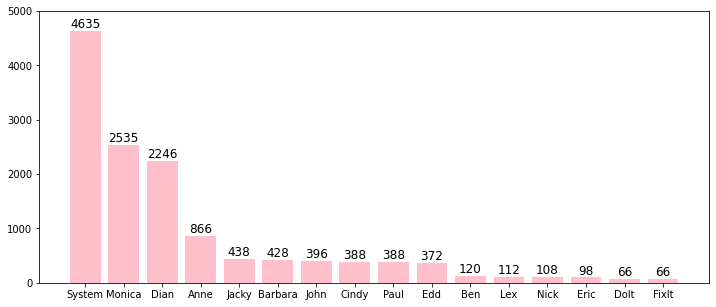

In [14]:
plt.figure(figsize = (12, 5))
bar = plt.bar(originator['name'], originator['count'], color = 'pink')
plt.ylim(0, 5000)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, '%d' % height, ha='center', va='bottom', size = 12)

plt.show()

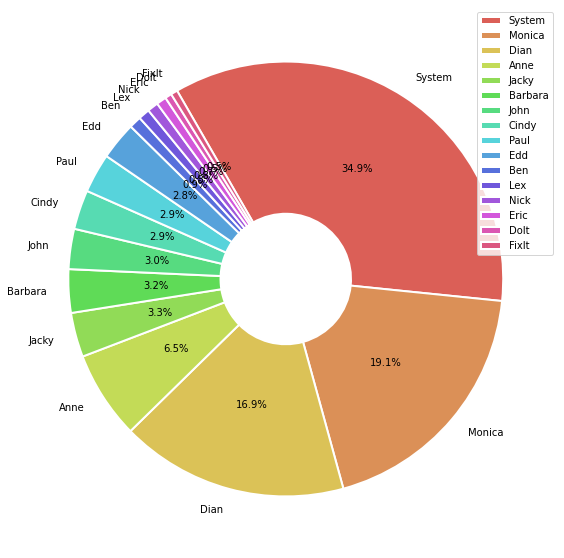

In [15]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
colors = sns.color_palette('hls',len(originator['name']))

plt.figure(figsize = (10, 10))
plt.pie(originator['count'], labels = originator['name'], autopct='%.1f%%', colors = colors, startangle = 120, counterclock = False, wedgeprops = wedgeprops)
plt.legend(labels = originator['name'])
plt.show()

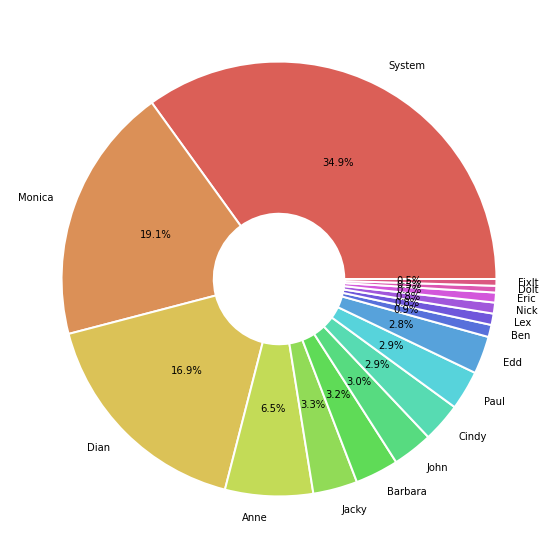

In [16]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
# colors = plt.get_cmap('jet')

plt.figure(figsize = (10, 10))
plt.pie(originator['count'], labels = originator['name'], autopct='%.1f%%', colors = colors, counterclock = True, wedgeprops = wedgeprops)
plt.show()

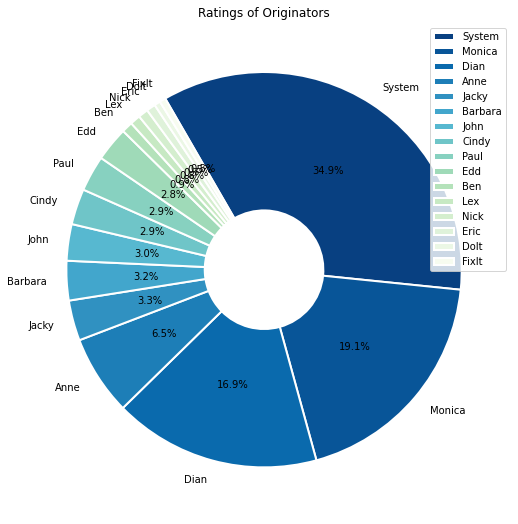

In [17]:
from matplotlib.gridspec import GridSpec

plt.figure(1, figsize=(40, 20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('GnBu_r')
colors = [cmap(i) for i in np.linspace(0, 1, len(originator['name']))]
plt.subplot(the_grid[0, 1], aspect=1, title = 'Ratings of Originators')
plt.pie(originator['count'], labels = originator['name'], autopct='%.1f%%', colors = colors, startangle = 120, counterclock = False, wedgeprops = wedgeprops)
plt.legend(labels = originator['name'])
plt.show()

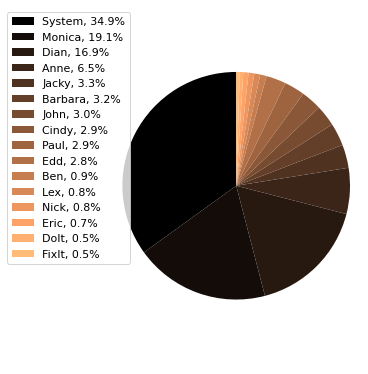

In [18]:
sizes = originator['count']
labels = originator['name']
 
fig1, ax1 = plt.subplots(figsize=(5, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('copper')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])
 
_, _ = ax1.pie(sizes, startangle=90, radius=1800)
 
ax1.axis('equal')
 
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
 
plt.show()

# 데이터 SQL 연동
- originator 쿼리 해결 못함...

In [19]:
!pip install google-cloud-bigquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import glob
from google.cloud import bigquery
from google.oauth2 import service_account

In [21]:
credential_path = "theta-lambda-367504-2df0dcb9993a.json"
credentials = service_account.Credentials.from_service_account_file(credential_path)

In [22]:
# GCP 클라이언트 객체 생성
client = bigquery.Client(credentials = credentials, 
                         project = credentials.project_id)

In [23]:
sql = f"""
SELECT CAST(CAST(caseID AS int) AS string) AS caseID
     , MIN(CASE WHEN taskID = "FirstContact" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS FirstContact
     , MIN(CASE WHEN taskID = "FirstContact" THEN contact END) AS FirstContact_type
     , MIN(CASE WHEN taskID = "FirstContact" THEN originator END) AS FirstContact_originator
     , MIN(CASE WHEN taskID = "InformClientWrongPlace" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS InformClientWrongPlace
     , MIN(CASE WHEN taskID = "InformClientWrongPlace" THEN originator END) AS InformClientWrongPlace_originator
     , MIN(CASE WHEN taskID = "MakeTicket" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS MakeTicket_start
     , MAX(CASE WHEN taskID = "MakeTicket" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS MakeTicket_end
     , MAX(CASE WHEN taskID = "MakeTicket" THEN RepairType END) AS repairtype -- 자료에는 MakeTicket_originator라고 되어 있음
     , MAX(CASE WHEN taskID = "MakeTicket" THEN objectKey END) AS objectkey
     , MAX(CASE WHEN taskID = "MakeTicket" THEN originator END) AS MakeTicket_originator
     , MIN(CASE WHEN taskID = "ArrangeSurvey" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS ArrangeSurvey_start
     , MIN(CASE WHEN taskID = "ArrangeSurvey" THEN originator END) AS ArrangeSurvey_start_originator
     , MAX(CASE WHEN taskID = "ArrangeSurvey" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS ArrangeSurvey_end
     , MAX(CASE WHEN taskID = "ArrangeSurvey" THEN originator END) AS ArrangeSurvey_end_originator
     , MIN(CASE WHEN taskID = "InformClientSurvey" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS InformClientSurvey
     , MAX(CASE WHEN taskID = "InformClientSurvey" THEN originator END) AS InformClientSurvey_originator
     , MIN(CASE WHEN taskID = "Survey" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS Survey_start
     , MAX(CASE WHEN taskID = "Survey" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS Survey_end
     , MAX(CASE WHEN taskID = "Survey" AND eventtype = "complete" THEN RepairInternally END) AS RepairInternally
     , MAX(CASE WHEN taskID = "Survey" AND eventtype = "complete" THEN EstimatedRepairTime END) AS EstimatedRepairTime
     , MAX(CASE WHEN taskID = "Survey" AND eventtype = "complete" THEN RepairCode END) AS RepairCode
     , MAX(CASE WHEN taskID = "Survey" THEN originator END) AS Survey_originator
     , MIN(CASE WHEN taskID = "InternRepair" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS InternRepair_start
     , MIN(CASE WHEN taskID = "InternRepair" THEN originator END) AS InternRepair_start_originator
     , MAX(CASE WHEN taskID = "InternRepair" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS InternRepair_end
     , MAX(CASE WHEN taskID = "InternRepair" THEN originator END) AS InternRepair_end_originator
     , MIN(CASE WHEN taskID = "ImmediateRepair" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS ImmediateRepair_start
     , MIN(CASE WHEN taskID = "ImmediateRepair" THEN originator END) AS ImmediateRepair_start_originator
     , MAX(CASE WHEN taskID = "ImmediateRepair" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS ImmediateRepair_end
     , MAX(CASE WHEN taskID = "ImmediateRepair" THEN originator END) AS ImmediateRepair_end_originator
     , MAX(CASE WHEN taskID = "ExternRepair" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS ExternRepair
     , MAX(CASE WHEN taskID = "ExternRepair" THEN originator END) AS ExternRepair_originator
     , MAX(CASE WHEN taskID = "RepairReady" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS RepairReady
     , MAX(CASE WHEN taskID = "SendTicketToFinAdmin" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS SendTicketToFinAdmin
     , MAX(CASE WHEN taskID = "ReadyInformClient" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS ReadyInformClient
     , MAX(CASE WHEN taskID = "TicketReady" THEn FORMAT_DATETIME('%F %X', timestamp) END) AS TicketReady
FROM `theta-lambda-367504.fix_source.fix_data_source`
GROUP BY caseID
"""

In [24]:
# 데이터 조회 쿼리 실행 결과
query_job = client.query(sql)

In [25]:
# 데이터프레임 변환
df = query_job.to_dataframe()
df.head()

,caseID,FirstContact,FirstContact_type,FirstContact_originator,InformClientWrongPlace,InformClientWrongPlace_originator,MakeTicket_start,MakeTicket_end,repairtype,objectkey,...,ImmediateRepair_start,ImmediateRepair_start_originator,ImmediateRepair_end,ImmediateRepair_end_originator,ExternRepair,ExternRepair_originator,RepairReady,SendTicketToFinAdmin,ReadyInformClient,TicketReady
0,1,1970-01-02 08:08:00,Phone,Dian,None,None,1970-01-02 08:08:00,1970-01-02 08:11:00,E,1340,...,None,None,None,None,None,None,1970-01-17 08:12:00,1970-01-17 14:03:00,1970-01-17 15:44:00,1970-01-17 15:44:00
1,2,1970-01-08 05:17:00,Personal,Dian,None,None,1970-01-08 05:17:00,1970-01-08 05:21:00,P,8161,...,1970-01-12 04:57:00,Anne,1970-01-12 06:57:00,Anne,1970-01-12 06:57:00,DoIt,1970-01-12 08:57:00,1970-01-12 15:14:00,1970-01-12 11:17:00,1970-01-12 15:14:00
2,3,1970-01-03 01:03:00,Phone,Dian,None,None,1970-01-03 01:03:00,1970-01-03 01:10:00,E,3844,...,None,None,None,None,None,None,1970-01-06 23:30:00,1970-01-07 06:26:00,1970-01-07 07:04:00,1970-01-07 07:04:00
3,4,1970-01-03 08:23:00,Personal,Monica,None,None,1970-01-03 08:23:00,1970-01-03 08:27:00,P,6582,...,1970-01-04 17:42:00,Anne,1970-01-04 19:42:00,Anne,None,None,1970-01-04 19:42:00,1970-01-04 23:35:00,1970-01-04 20:56:00,1970-01-04 23:35:00
4,5,1970-01-07 20:41:00,Letter,Monica,None,None,1970-01-07 20:41:00,1970-01-07 20:47:00,P,9857,...,1970-01-09 23:22:00,Anne,1970-01-10 01:10:00,Anne,None,None,1970-01-10 01:10:00,1970-01-10 06:05:00,1970-01-10 01:14:00,1970-01-10 06:05:00


In [26]:
target_df = pd.read_csv('4th_data(target).csv')
target_df.head()

,caseID,FirstContact,FirstContact_type,FirstContact_originator,InformClientWrongPlace,InformClientWrongPlace_originator,MakeTicket_start,MakeTicket_end,MakeTicket_originator,MakeTicket_originator:1,...,InternRepair_end_originator,ImmediateRepair_start,ImmediateRepair_start_originator,ImmediateRepair_end,ImmediateRepair_end_originator,ExternRepair,ExternRepair_originator,SendTicketToFinAdmin,ReadyInformClient,TicketReady
0,1,1970-01-02 08:08,Phone,Dian,NaN,NaN,1970-01-02 08:08,1970-01-02 08:11,E,Dian,...,John,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-17 14:03,1970-01-17 15:44,1970-01-17 15:44
1,2,1970-01-08 05:17,Personal,Dian,NaN,NaN,1970-01-08 05:17,1970-01-08 05:21,P,Dian,...,NaN,1970-01-12 04:57,Anne,1970-01-12 06:57,Anne,1970-01-12 06:57,DoIt,1970-01-12 15:14,1970-01-12 11:17,1970-01-12 15:14
2,3,1970-01-03 01:03,Phone,Dian,NaN,NaN,1970-01-03 01:03,1970-01-03 01:10,E,Dian,...,Paul,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07 06:26,1970-01-07 07:04,1970-01-07 07:04
3,4,1970-01-03 08:23,Personal,Monica,NaN,NaN,1970-01-03 08:23,1970-01-03 08:27,P,Monica,...,NaN,1970-01-04 17:42,Anne,1970-01-04 19:42,Anne,NaN,NaN,1970-01-04 23:35,1970-01-04 20:56,1970-01-04 23:35
4,5,1970-01-07 20:41,Letter,Monica,NaN,NaN,1970-01-07 20:41,1970-01-07 20:47,P,Monica,...,NaN,1970-01-09 23:22,Anne,1970-01-10 01:10,Anne,NaN,NaN,1970-01-10 06:05,1970-01-10 01:14,1970-01-10 06:05


In [27]:
df.columns

Index(['caseID', 'FirstContact', 'FirstContact_type',
       'FirstContact_originator', 'InformClientWrongPlace',
       'InformClientWrongPlace_originator', 'MakeTicket_start',
       'MakeTicket_end', 'repairtype', 'objectkey', 'MakeTicket_originator',
       'ArrangeSurvey_start', 'ArrangeSurvey_start_originator',
       'ArrangeSurvey_end', 'ArrangeSurvey_end_originator',
       'InformClientSurvey', 'InformClientSurvey_originator', 'Survey_start',
       'Survey_end', 'RepairInternally', 'EstimatedRepairTime', 'RepairCode',
       'Survey_originator', 'InternRepair_start',
       'InternRepair_start_originator', 'InternRepair_end',
       'InternRepair_end_originator', 'ImmediateRepair_start',
       'ImmediateRepair_start_originator', 'ImmediateRepair_end',
       'ImmediateRepair_end_originator', 'ExternRepair',
       'ExternRepair_originator', 'RepairReady', 'SendTicketToFinAdmin',
       'ReadyInformClient', 'TicketReady'],
      dtype='object')

In [28]:
df[df.index == 11]

,caseID,FirstContact,FirstContact_type,FirstContact_originator,InformClientWrongPlace,InformClientWrongPlace_originator,MakeTicket_start,MakeTicket_end,repairtype,objectkey,...,ImmediateRepair_start,ImmediateRepair_start_originator,ImmediateRepair_end,ImmediateRepair_end_originator,ExternRepair,ExternRepair_originator,RepairReady,SendTicketToFinAdmin,ReadyInformClient,TicketReady
11,12,1970-01-02 18:15:00,Personal,Monica,None,None,1970-01-02 18:15:00,1970-01-02 18:21:00,E,7195,...,None,None,None,None,None,None,1970-01-08 22:10:00,1970-01-09 05:16:00,1970-01-09 01:00:00,1970-01-09 05:16:00


In [29]:
df[df.index == 11]['InternRepair_start_originator']

11    Cindy
Name: InternRepair_start_originator, dtype: object

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   caseID                             1000 non-null   object 
 1   FirstContact                       1000 non-null   object 
 2   FirstContact_type                  1000 non-null   object 
 3   FirstContact_originator            1000 non-null   object 
 4   InformClientWrongPlace             73 non-null     object 
 5   InformClientWrongPlace_originator  73 non-null     object 
 6   MakeTicket_start                   927 non-null    object 
 7   MakeTicket_end                     927 non-null    object 
 8   repairtype                         927 non-null    object 
 9   objectkey                          927 non-null    Int64  
 10  MakeTicket_originator              927 non-null    object 
 11  ArrangeSurvey_start                927 non-null    object

In [31]:
target_df.columns

Index(['caseID', 'FirstContact', 'FirstContact_type',
       'FirstContact_originator', 'InformClientWrongPlace',
       'InformClientWrongPlace_originator', 'MakeTicket_start',
       'MakeTicket_end', 'MakeTicket_originator', 'MakeTicket_originator:1',
       'ArrangeSurvey_start', 'ArrangeSurvey_end', 'ArrangeSurvey_originator',
       'InformClientSurvey', 'InformClientSurvey_originator', 'Survey_start',
       'Survey_end', 'EstimatedRepairTime', 'Survey_originator',
       'InternRepair_start', 'InternRepair_start_originator',
       'InternRepair_end', 'InternRepair_end_originator',
       'ImmediateRepair_start', 'ImmediateRepair_start_originator',
       'ImmediateRepair_end', 'ImmediateRepair_end_originator', 'ExternRepair',
       'ExternRepair_originator', 'SendTicketToFinAdmin', 'ReadyInformClient',
       'TicketReady'],
      dtype='object')

In [32]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   caseID                             1000 non-null   int64  
 1   FirstContact                       1000 non-null   object 
 2   FirstContact_type                  1000 non-null   object 
 3   FirstContact_originator            1000 non-null   object 
 4   InformClientWrongPlace             73 non-null     object 
 5   InformClientWrongPlace_originator  73 non-null     object 
 6   MakeTicket_start                   927 non-null    object 
 7   MakeTicket_end                     927 non-null    object 
 8   MakeTicket_originator              927 non-null    object 
 9   MakeTicket_originator:1            927 non-null    object 
 10  ArrangeSurvey_start                927 non-null    object 
 11  ArrangeSurvey_end                  927 non-null    object

In [33]:
df['repairtype']

0      E
1      P
2      E
3      P
4      P
      ..
995    E
996    E
997    E
998    B
999    E
Name: repairtype, Length: 1000, dtype: object

# repair type에 따른 각 프로세스 소요시간 비교
- 부트캠프 자료 참고

In [34]:
df["FirstContact"] = pd.to_datetime(df["FirstContact"])

In [35]:
df["TicketReady"] = pd.to_datetime(df["TicketReady"])

In [36]:
df["InternRepair_start"] = pd.to_datetime(df["InternRepair_start"])
df["InternRepair_end"] = pd.to_datetime(df["InternRepair_end"])
df["ImmediateRepair_start"] = pd.to_datetime(df["ImmediateRepair_start"])
df["ImmediateRepair_end"] = pd.to_datetime(df["ImmediateRepair_end"])
df["ExternRepair"] = pd.to_datetime(df["ExternRepair"])
df['RepairReady'] = pd.to_datetime(df['RepairReady'])

In [37]:
# B 유형
type_B = df[df['repairtype'] == 'B']
type_B

,caseID,FirstContact,FirstContact_type,FirstContact_originator,InformClientWrongPlace,InformClientWrongPlace_originator,MakeTicket_start,MakeTicket_end,repairtype,objectkey,...,ImmediateRepair_start,ImmediateRepair_start_originator,ImmediateRepair_end,ImmediateRepair_end_originator,ExternRepair,ExternRepair_originator,RepairReady,SendTicketToFinAdmin,ReadyInformClient,TicketReady
16,17,1970-01-03 22:25:00,Personal,Dian,None,None,1970-01-03 22:25:00,1970-01-03 22:30:00,B,659,...,NaT,None,NaT,None,1970-01-03 23:04:00,DoIt,1970-01-04 07:04:00,1970-01-04 09:21:00,1970-01-04 08:45:00,1970-01-04 09:21:00
22,23,1970-01-03 10:48:00,Phone,Monica,None,None,1970-01-03 10:48:00,1970-01-03 10:53:00,B,9334,...,1970-01-03 11:18:00,Nick,1970-01-03 12:12:00,Nick,NaT,None,1970-01-03 12:12:00,1970-01-03 12:40:00,1970-01-03 15:07:00,1970-01-03 15:07:00
44,45,1970-01-04 14:23:00,Web,Monica,None,None,1970-01-04 14:23:00,1970-01-04 14:25:00,B,2808,...,1970-01-05 07:56:00,Eric,1970-01-05 08:50:00,Eric,NaT,None,1970-01-05 08:50:00,1970-01-05 14:27:00,1970-01-05 11:26:00,1970-01-05 14:27:00
54,55,1970-01-04 07:18:00,Personal,Dian,None,None,1970-01-04 07:18:00,1970-01-04 07:27:00,B,6197,...,NaT,None,NaT,None,NaT,None,1970-01-04 14:01:00,1970-01-04 16:13:00,1970-01-04 20:10:00,1970-01-04 20:10:00
61,62,1970-01-07 18:06:00,Phone,Monica,None,None,1970-01-07 18:06:00,1970-01-07 18:10:00,B,1442,...,NaT,None,NaT,None,NaT,None,1970-01-07 23:00:00,1970-01-08 00:21:00,1970-01-08 01:56:00,1970-01-08 01:56:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,976,1970-01-06 04:02:00,Personal,Dian,None,None,1970-01-06 04:02:00,1970-01-06 04:10:00,B,2788,...,NaT,None,NaT,None,NaT,None,1970-01-06 06:25:00,1970-01-06 11:08:00,1970-01-06 08:15:00,1970-01-06 11:08:00
977,978,1970-01-07 02:03:00,Personal,Monica,None,None,1970-01-07 02:03:00,1970-01-07 02:09:00,B,4820,...,NaT,None,NaT,None,NaT,None,1970-01-07 05:50:00,1970-01-07 07:13:00,1970-01-07 07:05:00,1970-01-07 07:13:00
982,983,1970-01-05 00:02:00,Web,Dian,None,None,1970-01-05 00:02:00,1970-01-05 00:07:00,B,513,...,NaT,None,NaT,None,NaT,None,1970-01-05 08:32:00,1970-01-05 10:09:00,1970-01-05 16:16:00,1970-01-05 16:16:00
991,992,1970-01-03 03:33:00,Letter,Dian,None,None,1970-01-03 03:33:00,1970-01-03 03:38:00,B,5896,...,NaT,None,NaT,None,1970-01-03 07:51:00,DoIt,1970-01-03 16:39:00,1970-01-03 22:11:00,1970-01-03 18:40:00,1970-01-03 22:11:00


In [38]:
type_B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 16 to 998
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   caseID                             118 non-null    object        
 1   FirstContact                       118 non-null    datetime64[ns]
 2   FirstContact_type                  118 non-null    object        
 3   FirstContact_originator            118 non-null    object        
 4   InformClientWrongPlace             0 non-null      object        
 5   InformClientWrongPlace_originator  0 non-null      object        
 6   MakeTicket_start                   118 non-null    object        
 7   MakeTicket_end                     118 non-null    object        
 8   repairtype                         118 non-null    object        
 9   objectkey                          118 non-null    Int64         
 10  MakeTicket_originator              11

In [39]:
# E 유형
type_E = df[df['repairtype'] == 'E']
type_E

,caseID,FirstContact,FirstContact_type,FirstContact_originator,InformClientWrongPlace,InformClientWrongPlace_originator,MakeTicket_start,MakeTicket_end,repairtype,objectkey,...,ImmediateRepair_start,ImmediateRepair_start_originator,ImmediateRepair_end,ImmediateRepair_end_originator,ExternRepair,ExternRepair_originator,RepairReady,SendTicketToFinAdmin,ReadyInformClient,TicketReady
0,1,1970-01-02 08:08:00,Phone,Dian,None,None,1970-01-02 08:08:00,1970-01-02 08:11:00,E,1340,...,NaT,None,NaT,None,NaT,None,1970-01-17 08:12:00,1970-01-17 14:03:00,1970-01-17 15:44:00,1970-01-17 15:44:00
2,3,1970-01-03 01:03:00,Phone,Dian,None,None,1970-01-03 01:03:00,1970-01-03 01:10:00,E,3844,...,NaT,None,NaT,None,NaT,None,1970-01-06 23:30:00,1970-01-07 06:26:00,1970-01-07 07:04:00,1970-01-07 07:04:00
11,12,1970-01-02 18:15:00,Personal,Monica,None,None,1970-01-02 18:15:00,1970-01-02 18:21:00,E,7195,...,NaT,None,NaT,None,NaT,None,1970-01-08 22:10:00,1970-01-09 05:16:00,1970-01-09 01:00:00,1970-01-09 05:16:00
17,18,1970-01-08 06:17:00,Phone,Monica,None,None,1970-01-08 06:17:00,1970-01-08 06:21:00,E,9679,...,NaT,None,NaT,None,1970-01-14 03:12:00,DoIt,1970-01-14 07:12:00,1970-01-14 11:32:00,1970-01-14 10:58:00,1970-01-14 11:32:00
23,24,1970-01-07 05:43:00,Letter,Dian,None,None,1970-01-07 05:43:00,1970-01-07 05:46:00,E,7659,...,NaT,None,NaT,None,NaT,None,1970-01-15 14:52:00,1970-01-15 22:47:00,1970-01-15 19:33:00,1970-01-15 22:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,1970-01-08 03:59:00,Web,Monica,None,None,1970-01-08 03:59:00,1970-01-08 04:03:00,E,7350,...,NaT,None,NaT,None,NaT,None,1970-01-13 23:15:00,1970-01-14 06:48:00,1970-01-14 07:03:00,1970-01-14 07:03:00
995,996,1970-01-01 18:08:00,Phone,Monica,None,None,1970-01-01 18:08:00,1970-01-01 18:14:00,E,1851,...,NaT,None,NaT,None,NaT,None,1970-01-02 12:29:00,1970-01-02 14:44:00,1970-01-02 17:15:00,1970-01-02 17:15:00
996,997,1970-01-06 20:58:00,Phone,Dian,None,None,1970-01-06 20:58:00,1970-01-06 21:02:00,E,3807,...,NaT,None,NaT,None,NaT,None,1970-01-14 20:19:00,1970-01-15 00:59:00,1970-01-15 04:14:00,1970-01-15 04:14:00
997,998,1970-01-07 01:37:00,Personal,Dian,None,None,1970-01-07 01:37:00,1970-01-07 01:45:00,E,2142,...,NaT,None,NaT,None,NaT,None,1970-01-19 10:34:00,1970-01-19 13:55:00,1970-01-19 11:44:00,1970-01-19 13:55:00


In [40]:
# P 유형
type_P = df[df['repairtype'] == 'P']
type_P

,caseID,FirstContact,FirstContact_type,FirstContact_originator,InformClientWrongPlace,InformClientWrongPlace_originator,MakeTicket_start,MakeTicket_end,repairtype,objectkey,...,ImmediateRepair_start,ImmediateRepair_start_originator,ImmediateRepair_end,ImmediateRepair_end_originator,ExternRepair,ExternRepair_originator,RepairReady,SendTicketToFinAdmin,ReadyInformClient,TicketReady
1,2,1970-01-08 05:17:00,Personal,Dian,None,None,1970-01-08 05:17:00,1970-01-08 05:21:00,P,8161,...,1970-01-12 04:57:00,Anne,1970-01-12 06:57:00,Anne,1970-01-12 06:57:00,DoIt,1970-01-12 08:57:00,1970-01-12 15:14:00,1970-01-12 11:17:00,1970-01-12 15:14:00
3,4,1970-01-03 08:23:00,Personal,Monica,None,None,1970-01-03 08:23:00,1970-01-03 08:27:00,P,6582,...,1970-01-04 17:42:00,Anne,1970-01-04 19:42:00,Anne,NaT,None,1970-01-04 19:42:00,1970-01-04 23:35:00,1970-01-04 20:56:00,1970-01-04 23:35:00
4,5,1970-01-07 20:41:00,Letter,Monica,None,None,1970-01-07 20:41:00,1970-01-07 20:47:00,P,9857,...,1970-01-09 23:22:00,Anne,1970-01-10 01:10:00,Anne,NaT,None,1970-01-10 01:10:00,1970-01-10 06:05:00,1970-01-10 01:14:00,1970-01-10 06:05:00
7,8,1970-01-07 05:49:00,Personal,Monica,None,None,1970-01-07 05:49:00,1970-01-07 05:55:00,P,9385,...,1970-01-14 02:14:00,Jacky,1970-01-14 04:14:00,Jacky,NaT,None,1970-01-14 04:14:00,1970-01-14 08:31:00,1970-01-14 08:03:00,1970-01-14 08:31:00
8,9,1970-01-03 19:08:00,Phone,Dian,None,None,1970-01-03 19:08:00,1970-01-03 19:13:00,P,1772,...,1970-01-03 21:25:00,Anne,1970-01-03 23:37:00,Anne,NaT,None,1970-01-03 23:37:00,1970-01-04 04:31:00,1970-01-04 02:39:00,1970-01-04 04:31:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,981,1970-01-01 18:09:00,Personal,Dian,None,None,1970-01-01 18:09:00,1970-01-01 18:14:00,P,9412,...,1970-01-02 10:16:00,Anne,1970-01-02 12:28:00,Anne,1970-01-02 12:28:00,FixIt,1970-01-02 15:28:00,1970-01-02 16:15:00,1970-01-02 19:10:00,1970-01-02 19:10:00
985,986,1970-01-06 10:19:00,Personal,Dian,None,None,1970-01-06 10:19:00,1970-01-06 10:24:00,P,6524,...,1970-01-08 03:08:00,Anne,1970-01-08 05:08:00,Anne,NaT,None,1970-01-08 05:08:00,1970-01-08 05:29:00,1970-01-08 06:24:00,1970-01-08 06:24:00
986,987,1970-01-02 18:54:00,Web,Monica,None,None,1970-01-02 18:54:00,1970-01-02 18:58:00,P,2371,...,NaT,None,NaT,None,NaT,None,1970-01-03 10:45:00,1970-01-03 15:04:00,1970-01-03 13:18:00,1970-01-03 15:04:00
988,989,1970-01-01 21:22:00,Letter,Monica,None,None,1970-01-01 21:22:00,1970-01-01 21:24:00,P,6564,...,1970-01-02 16:05:00,Anne,1970-01-02 17:53:00,Anne,1970-01-02 17:53:00,DoIt,1970-01-02 19:41:00,1970-01-03 03:24:00,1970-01-02 23:14:00,1970-01-03 03:24:00


In [41]:
type_B['TicketReady'] - type_B['FirstContact']

16    0 days 10:56:00
22    0 days 04:19:00
44    1 days 00:04:00
54    0 days 12:52:00
61    0 days 07:50:00
            ...      
975   0 days 07:06:00
977   0 days 05:10:00
982   0 days 16:14:00
991   0 days 18:38:00
998   0 days 11:42:00
Length: 118, dtype: timedelta64[ns]

In [42]:
type_E['TicketReady'] - type_E['FirstContact']

0     15 days 07:36:00
2      4 days 06:01:00
11     6 days 11:01:00
17     6 days 05:15:00
23     8 days 17:04:00
            ...       
994    6 days 03:04:00
995    0 days 23:07:00
996    8 days 07:16:00
997   12 days 12:18:00
999   12 days 06:08:00
Length: 370, dtype: timedelta64[ns]

In [43]:
type_P['TicketReady'] - type_P['FirstContact']

1     4 days 09:57:00
3     1 days 15:12:00
4     2 days 09:24:00
7     7 days 02:42:00
8     0 days 09:23:00
            ...      
980   1 days 01:01:00
985   1 days 20:05:00
986   0 days 20:10:00
988   1 days 06:02:00
990   4 days 11:14:00
Length: 439, dtype: timedelta64[ns]

In [44]:
# 일수 차이
type_B['days'] = (type_B['TicketReady'] - type_B['FirstContact']).dt.days
type_E['days'] = (type_E['TicketReady'] - type_E['FirstContact']).dt.days
type_P['days'] = (type_P['TicketReady'] - type_P['FirstContact']).dt.days

In [45]:
type_B['days'].describe()

count    118.000000
mean       0.050847
std        0.220623
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: days, dtype: float64

In [46]:
type_E['days'].describe()

count    370.000000
mean       6.124324
std        4.603016
min        0.000000
25%        2.000000
50%        6.000000
75%       10.000000
max       17.000000
Name: days, dtype: float64

In [47]:
type_P['days'].describe()

count    439.000000
mean       3.086560
std        2.916929
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       12.000000
Name: days, dtype: float64

# 작업 진행 소요 일시 비교

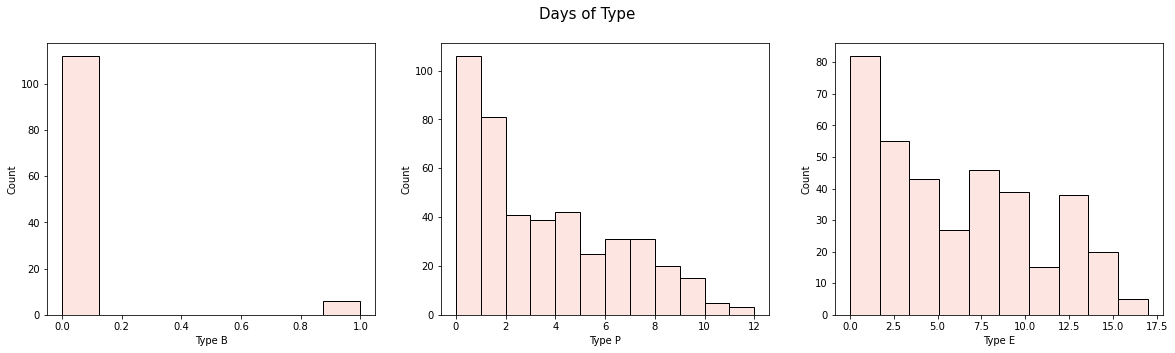

In [48]:
sns.set_palette("RdPu")

plt.figure(figsize = (20, 5))
plt.subplot(1, 3, 1)
sns.histplot(type_B['days'])
plt.xlabel('Type B')
plt.subplot(1, 3, 2)
sns.histplot(type_P['days'], )
plt.xlabel('Type P')
plt.subplot(1, 3, 3)
sns.histplot(type_E['days'])
plt.xlabel('Type E')

plt.suptitle("Days of Type", fontsize = 15)
plt.show()

# 작업 추정 예상 시간 비교

In [49]:
type_B["EstimatedRepairTime"].describe()

count    118.000000
mean     236.949153
std      129.578597
min       60.000000
25%      160.000000
50%      240.000000
75%      240.000000
max      480.000000
Name: EstimatedRepairTime, dtype: float64

In [50]:
type_E["EstimatedRepairTime"].describe()

count    370.000000
mean     232.648649
std        9.655913
min      220.000000
25%      220.000000
50%      240.000000
75%      240.000000
max      240.000000
Name: EstimatedRepairTime, dtype: float64

In [51]:
type_P["EstimatedRepairTime"].describe()

count    439.000000
mean     150.615034
std       72.397525
min      120.000000
25%      120.000000
50%      120.000000
75%      120.000000
max      360.000000
Name: EstimatedRepairTime, dtype: float64

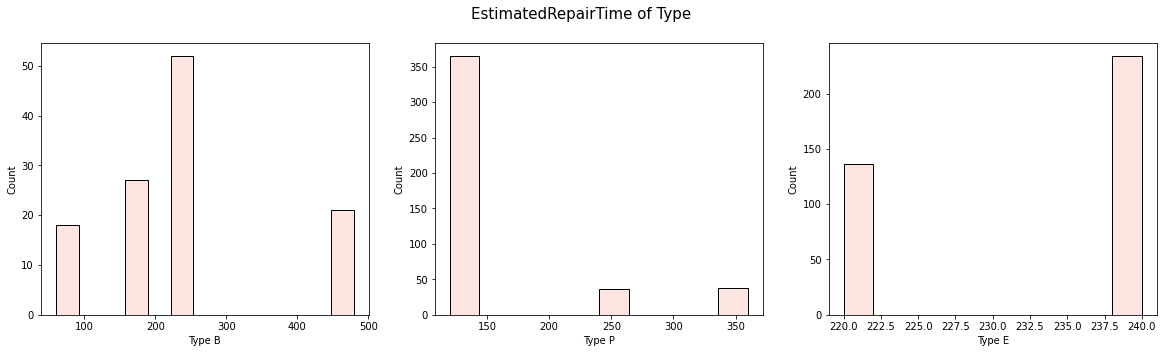

In [52]:
sns.set_palette("RdPu")

plt.figure(figsize = (20, 5))
plt.subplot(1, 3, 1)
sns.histplot(type_B['EstimatedRepairTime'])
plt.xlabel('Type B')
plt.subplot(1, 3, 2)
sns.histplot(type_P['EstimatedRepairTime'], )
plt.xlabel('Type P')
plt.subplot(1, 3, 3)
sns.histplot(type_E['EstimatedRepairTime'])
plt.xlabel('Type E')

plt.suptitle("EstimatedRepairTime of Type", fontsize = 15)
plt.show()

# 최초 repair type 할당 이후(예상 수리 시간) 검토

### B 유형
- 당사 수리 or 내부 수리  = True
- 외부 수리 = False

In [53]:
type_B['InternRepair_start'].count()

79

In [54]:
type_B['ImmediateRepair_start'].count()

18

In [55]:
len(type_B[type_B['RepairInternally'] == True])

97

In [56]:
type_B['ExternRepair'].count()

32

In [57]:
type_B[type_B['RepairInternally'] == False]

,caseID,FirstContact,FirstContact_type,FirstContact_originator,InformClientWrongPlace,InformClientWrongPlace_originator,MakeTicket_start,MakeTicket_end,repairtype,objectkey,...,ImmediateRepair_start_originator,ImmediateRepair_end,ImmediateRepair_end_originator,ExternRepair,ExternRepair_originator,RepairReady,SendTicketToFinAdmin,ReadyInformClient,TicketReady,days
16,17,1970-01-03 22:25:00,Personal,Dian,None,None,1970-01-03 22:25:00,1970-01-03 22:30:00,B,659,...,None,NaT,None,1970-01-03 23:04:00,DoIt,1970-01-04 07:04:00,1970-01-04 09:21:00,1970-01-04 08:45:00,1970-01-04 09:21:00,0
99,100,1970-01-01 23:11:00,Phone,Monica,None,None,1970-01-01 23:11:00,1970-01-01 23:16:00,B,4991,...,None,NaT,None,1970-01-01 23:43:00,FixIt,1970-01-02 08:31:00,1970-01-02 11:39:00,1970-01-02 14:36:00,1970-01-02 14:36:00,0
197,198,1970-01-01 09:13:00,Phone,Dian,None,None,1970-01-01 09:13:00,1970-01-01 09:15:00,B,3020,...,None,NaT,None,1970-01-01 09:38:00,FixIt,1970-01-01 19:14:00,1970-01-01 21:46:00,1970-01-01 22:27:00,1970-01-01 22:27:00,0
336,337,1970-01-02 12:30:00,Letter,Monica,None,None,1970-01-02 12:30:00,1970-01-02 12:35:00,B,8431,...,None,NaT,None,1970-01-02 13:14:00,DoIt,1970-01-02 22:02:00,1970-01-03 03:33:00,1970-01-03 02:13:00,1970-01-03 03:33:00,0
379,380,1970-01-06 21:09:00,Personal,Dian,None,None,1970-01-06 21:09:00,1970-01-06 21:13:00,B,4176,...,None,NaT,None,1970-01-06 21:31:00,DoIt,1970-01-07 05:31:00,1970-01-07 06:25:00,1970-01-07 08:36:00,1970-01-07 08:36:00,0
466,467,1970-01-06 22:29:00,Phone,Dian,None,None,1970-01-06 22:29:00,1970-01-06 22:34:00,B,2135,...,None,NaT,None,1970-01-06 23:19:00,DoIt,1970-01-07 08:07:00,1970-01-07 11:14:00,1970-01-07 10:13:00,1970-01-07 11:14:00,0
493,494,1970-01-02 22:18:00,Phone,Dian,None,None,1970-01-02 22:18:00,1970-01-02 22:26:00,B,7567,...,None,NaT,None,1970-01-02 22:47:00,DoIt,1970-01-03 05:59:00,1970-01-03 10:02:00,1970-01-03 07:29:00,1970-01-03 10:02:00,0
542,543,1970-01-04 20:24:00,Letter,Monica,None,None,1970-01-04 20:24:00,1970-01-04 20:26:00,B,3351,...,None,NaT,None,1970-01-05 02:23:00,DoIt,1970-01-05 11:11:00,1970-01-05 12:10:00,1970-01-05 18:01:00,1970-01-05 18:01:00,0
582,583,1970-01-02 13:32:00,Phone,Monica,None,None,1970-01-02 13:32:00,1970-01-02 13:36:00,B,4466,...,None,NaT,None,1970-01-02 13:58:00,FixIt,1970-01-03 01:10:00,1970-01-03 02:32:00,1970-01-03 07:33:00,1970-01-03 07:33:00,0
596,597,1970-01-07 00:49:00,Letter,Dian,None,None,1970-01-07 00:49:00,1970-01-07 00:55:00,B,9528,...,None,NaT,None,1970-01-07 01:40:00,FixIt,1970-01-07 11:16:00,1970-01-07 13:28:00,1970-01-07 17:46:00,1970-01-07 17:46:00,0


### E 유형

In [58]:
type_E['InternRepair_start'].count()

370

In [59]:
type_E['ImmediateRepair_start'].count()

0

In [60]:
type_E['ExternRepair'].count()

17

In [61]:
type_E[type_E['RepairInternally'] == False]

,caseID,FirstContact,FirstContact_type,FirstContact_originator,InformClientWrongPlace,InformClientWrongPlace_originator,MakeTicket_start,MakeTicket_end,repairtype,objectkey,...,ImmediateRepair_start_originator,ImmediateRepair_end,ImmediateRepair_end_originator,ExternRepair,ExternRepair_originator,RepairReady,SendTicketToFinAdmin,ReadyInformClient,TicketReady,days


### P 유형

In [62]:
type_P['InternRepair_start'].count()

59

In [63]:
type_P['ImmediateRepair_start'].count()

365

In [64]:
len(type_P[type_P['RepairInternally'] == True])

401

In [65]:
type_P['ExternRepair'].count()

83

In [66]:
type_P[type_P['RepairInternally'] == False]

,caseID,FirstContact,FirstContact_type,FirstContact_originator,InformClientWrongPlace,InformClientWrongPlace_originator,MakeTicket_start,MakeTicket_end,repairtype,objectkey,...,ImmediateRepair_start_originator,ImmediateRepair_end,ImmediateRepair_end_originator,ExternRepair,ExternRepair_originator,RepairReady,SendTicketToFinAdmin,ReadyInformClient,TicketReady,days
21,22,1970-01-07 10:25:00,Letter,Monica,None,None,1970-01-07 10:25:00,1970-01-07 10:31:00,P,7752,...,None,NaT,None,1970-01-07 18:57:00,FixIt,1970-01-08 00:57:00,1970-01-08 08:18:00,1970-01-08 05:47:00,1970-01-08 08:18:00,0
29,30,1970-01-04 03:17:00,Letter,Monica,None,None,1970-01-04 03:17:00,1970-01-04 03:22:00,P,7246,...,None,NaT,None,1970-01-07 18:24:00,DoIt,1970-01-08 01:00:00,1970-01-08 02:26:00,1970-01-08 06:28:00,1970-01-08 06:28:00,4
31,32,1970-01-07 21:03:00,Letter,Monica,None,None,1970-01-07 21:03:00,1970-01-07 21:06:00,P,5759,...,None,NaT,None,1970-01-14 10:58:00,FixIt,1970-01-14 17:34:00,1970-01-15 01:24:00,1970-01-14 22:30:00,1970-01-15 01:24:00,7
102,103,1970-01-05 04:01:00,Personal,Monica,None,None,1970-01-05 04:01:00,1970-01-05 04:03:00,P,5650,...,None,NaT,None,1970-01-05 12:50:00,FixIt,1970-01-05 18:50:00,1970-01-06 02:40:00,1970-01-06 02:12:00,1970-01-06 02:40:00,0
112,113,1970-01-05 21:39:00,Web,Dian,None,None,1970-01-05 21:39:00,1970-01-05 21:45:00,P,7026,...,None,NaT,None,1970-01-12 22:40:00,DoIt,1970-01-13 04:04:00,1970-01-13 07:59:00,1970-01-13 11:43:00,1970-01-13 11:43:00,7
135,136,1970-01-01 19:36:00,Personal,Monica,None,None,1970-01-01 19:36:00,1970-01-01 19:41:00,P,8514,...,None,NaT,None,1970-01-01 20:56:00,DoIt,1970-01-02 03:32:00,1970-01-02 11:23:00,1970-01-02 06:57:00,1970-01-02 11:23:00,0
171,172,1970-01-02 04:43:00,Personal,Monica,None,None,1970-01-02 04:43:00,1970-01-02 04:47:00,P,5484,...,None,NaT,None,1970-01-08 14:10:00,DoIt,1970-01-08 19:34:00,1970-01-09 01:26:00,1970-01-09 02:33:00,1970-01-09 02:33:00,6
181,182,1970-01-02 12:11:00,Personal,Monica,None,None,1970-01-02 12:11:00,1970-01-02 12:17:00,P,1069,...,None,NaT,None,1970-01-04 03:02:00,FixIt,1970-01-04 10:14:00,1970-01-04 17:39:00,1970-01-04 13:40:00,1970-01-04 17:39:00,2
194,195,1970-01-07 11:06:00,Phone,Dian,None,None,1970-01-07 11:06:00,1970-01-07 11:08:00,P,4247,...,None,NaT,None,1970-01-10 09:22:00,DoIt,1970-01-10 15:22:00,1970-01-10 17:14:00,1970-01-10 16:04:00,1970-01-10 17:14:00,3
217,218,1970-01-04 12:39:00,Web,Monica,None,None,1970-01-04 12:39:00,1970-01-04 12:41:00,P,7118,...,None,NaT,None,1970-01-07 09:35:00,FixIt,1970-01-07 18:35:00,1970-01-07 18:45:00,1970-01-07 19:21:00,1970-01-07 19:21:00,3


# 결측치 확인


In [74]:
# 원본 데이터
source_df

,caseID,taskID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
0,1,FirstContact,Dian,complete,1970-01-02 8:08,Phone,NaN,NaN,NaN,NaN,NaN,NaN
1,1,MakeTicket,Dian,start,1970-01-02 8:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,MakeTicket,Dian,complete,1970-01-02 8:11,NaN,E,1340.0,NaN,NaN,NaN,NaN
3,1,ArrangeSurvey,Dian,start,1970-01-02 8:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,ArrangeSurvey,Dian,complete,1970-01-02 8:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13257,1000,InternRepair,John,complete,1970-01-19 18:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13258,1000,RepairReady,System,complete,1970-01-19 18:34,NaN,NaN,NaN,NaN,NaN,NaN,True
13259,1000,SendTicketToFinAdmin,System,complete,1970-01-20 1:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13260,1000,ReadyInformClient,System,complete,1970-01-20 2:25,NaN,NaN,NaN,NaN,NaN,NaN,True


In [80]:
wrong_caseid = source_df[source_df['taskID'] == 'InformClientWrongPlace']['caseID']
wrong_caseid

72         6
74         7
148       13
519       40
809       61
        ... 
11492    871
11650    883
12132    918
12454    942
12785    966
Name: caseID, Length: 73, dtype: int64

In [84]:
source_df[source_df['caseID'] == 6]

,caseID,taskID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
71,6,FirstContact,Monica,complete,1970-01-03 2:29,Letter,NaN,NaN,NaN,NaN,NaN,NaN
72,6,InformClientWrongPlace,Monica,complete,1970-01-03 2:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
source_df2 = source_df.copy()

In [95]:
for i in wrong_caseid.values:
  source_df2.drop(source_df[source_df['caseID'] == i].index, axis = 0, inplace = True) # informclientwrongplace 제거

In [96]:
source_df2

,caseID,taskID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
0,1,FirstContact,Dian,complete,1970-01-02 8:08,Phone,NaN,NaN,NaN,NaN,NaN,NaN
1,1,MakeTicket,Dian,start,1970-01-02 8:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,MakeTicket,Dian,complete,1970-01-02 8:11,NaN,E,1340.0,NaN,NaN,NaN,NaN
3,1,ArrangeSurvey,Dian,start,1970-01-02 8:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,ArrangeSurvey,Dian,complete,1970-01-02 8:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13257,1000,InternRepair,John,complete,1970-01-19 18:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13258,1000,RepairReady,System,complete,1970-01-19 18:34,NaN,NaN,NaN,NaN,NaN,NaN,True
13259,1000,SendTicketToFinAdmin,System,complete,1970-01-20 1:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13260,1000,ReadyInformClient,System,complete,1970-01-20 2:25,NaN,NaN,NaN,NaN,NaN,NaN,True


In [97]:
source_df2[source_df2['caseID'] == 6]

,caseID,taskID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK


In [101]:
source_df2.to_csv("refine_df2.csv", index = False)

In [102]:
credential_path = "my-project2-379402-7e14ab6d3864.json"
credentials = service_account.Credentials.from_service_account_file(credential_path)

client = bigquery.Client(credentials = credentials, 
                         project = credentials.project_id)

In [103]:
# informclientwrongplace 제거 후 target_df
sql = f"""
SELECT CAST(CAST(caseID AS int) AS string) AS caseID
     , MIN(CASE WHEN taskID = "FirstContact" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS FirstContact
     , MIN(CASE WHEN taskID = "FirstContact" THEN contact END) AS FirstContact_type
     , MIN(CASE WHEN taskID = "FirstContact" THEN originator END) AS FirstContact_originator
     , MIN(CASE WHEN taskID = "MakeTicket" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS MakeTicket_start
     , MAX(CASE WHEN taskID = "MakeTicket" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS MakeTicket_end
     , MAX(CASE WHEN taskID = "MakeTicket" THEN RepairType END) AS repairtype -- 자료에는 MakeTicket_originator라고 되어 있음
     , MAX(CASE WHEN taskID = "MakeTicket" THEN objectKey END) AS objectkey
     , MAX(CASE WHEN taskID = "MakeTicket" THEN originator END) AS MakeTicket_originator
     , MIN(CASE WHEN taskID = "ArrangeSurvey" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS ArrangeSurvey_start
     , MIN(CASE WHEN taskID = "ArrangeSurvey" THEN originator END) AS ArrangeSurvey_start_originator
     , MAX(CASE WHEN taskID = "ArrangeSurvey" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS ArrangeSurvey_end
     , MAX(CASE WHEN taskID = "ArrangeSurvey" THEN originator END) AS ArrangeSurvey_end_originator
     , MIN(CASE WHEN taskID = "InformClientSurvey" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS InformClientSurvey
     , MAX(CASE WHEN taskID = "InformClientSurvey" THEN originator END) AS InformClientSurvey_originator
     , MIN(CASE WHEN taskID = "Survey" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS Survey_start
     , MAX(CASE WHEN taskID = "Survey" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS Survey_end
     , MAX(CASE WHEN taskID = "Survey" AND eventtype = "complete" THEN RepairInternally END) AS RepairInternally
     , MAX(CASE WHEN taskID = "Survey" AND eventtype = "complete" THEN EstimatedRepairTime END) AS EstimatedRepairTime
     , MAX(CASE WHEN taskID = "Survey" AND eventtype = "complete" THEN RepairCode END) AS RepairCode
     , MAX(CASE WHEN taskID = "Survey" THEN originator END) AS Survey_originator
     , MIN(CASE WHEN taskID = "InternRepair" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS InternRepair_start
     , MIN(CASE WHEN taskID = "InternRepair" THEN originator END) AS InternRepair_start_originator
     , MAX(CASE WHEN taskID = "InternRepair" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS InternRepair_end
     , MAX(CASE WHEN taskID = "InternRepair" THEN originator END) AS InternRepair_end_originator
     , MIN(CASE WHEN taskID = "ImmediateRepair" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS ImmediateRepair_start
     , MIN(CASE WHEN taskID = "ImmediateRepair" THEN originator END) AS ImmediateRepair_start_originator
     , MAX(CASE WHEN taskID = "ImmediateRepair" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS ImmediateRepair_end
     , MAX(CASE WHEN taskID = "ImmediateRepair" THEN originator END) AS ImmediateRepair_end_originator
     , MAX(CASE WHEN taskID = "ExternRepair" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS ExternRepair
     , MAX(CASE WHEN taskID = "ExternRepair" THEN originator END) AS ExternRepair_originator
     , MAX(CASE WHEN taskID = "RepairReady" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS RepairReady
     , MAX(CASE WHEN taskID = "SendTicketToFinAdmin" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS SendTicketToFinAdmin
     , MAX(CASE WHEN taskID = "ReadyInformClient" THEN FORMAT_DATETIME('%F %X', timestamp) END) AS ReadyInformClient
     , MAX(CASE WHEN taskID = "TicketReady" THEn FORMAT_DATETIME('%F %X', timestamp) END) AS TicketReady
FROM `my-project2-379402.fix_source.fix_source_wrong_drop`
GROUP BY caseID
"""

In [105]:
query_job = client.query(sql)

In [106]:
wrong_drop_df = query_job.to_dataframe()
wrong_drop_df

,caseID,FirstContact,FirstContact_type,FirstContact_originator,MakeTicket_start,MakeTicket_end,repairtype,objectkey,MakeTicket_originator,ArrangeSurvey_start,...,ImmediateRepair_start,ImmediateRepair_start_originator,ImmediateRepair_end,ImmediateRepair_end_originator,ExternRepair,ExternRepair_originator,RepairReady,SendTicketToFinAdmin,ReadyInformClient,TicketReady
0,1,1970-01-02 08:08:00,Phone,Dian,1970-01-02 08:08:00,1970-01-02 08:11:00,E,1340.0,Dian,1970-01-02 08:11:00,...,None,None,None,None,None,None,1970-01-17 08:12:00,1970-01-17 14:03:00,1970-01-17 15:44:00,1970-01-17 15:44:00
1,2,1970-01-08 05:17:00,Personal,Dian,1970-01-08 05:17:00,1970-01-08 05:21:00,P,8161.0,Dian,1970-01-08 05:21:00,...,1970-01-12 04:57:00,Anne,1970-01-12 06:57:00,Anne,1970-01-12 06:57:00,DoIt,1970-01-12 08:57:00,1970-01-12 15:14:00,1970-01-12 11:17:00,1970-01-12 15:14:00
2,3,1970-01-03 01:03:00,Phone,Dian,1970-01-03 01:03:00,1970-01-03 01:10:00,E,3844.0,Dian,1970-01-03 01:10:00,...,None,None,None,None,None,None,1970-01-06 23:30:00,1970-01-07 06:26:00,1970-01-07 07:04:00,1970-01-07 07:04:00
3,4,1970-01-03 08:23:00,Personal,Monica,1970-01-03 08:23:00,1970-01-03 08:27:00,P,6582.0,Monica,1970-01-03 08:27:00,...,1970-01-04 17:42:00,Anne,1970-01-04 19:42:00,Anne,None,None,1970-01-04 19:42:00,1970-01-04 23:35:00,1970-01-04 20:56:00,1970-01-04 23:35:00
4,5,1970-01-07 20:41:00,Letter,Monica,1970-01-07 20:41:00,1970-01-07 20:47:00,P,9857.0,Monica,1970-01-07 20:47:00,...,1970-01-09 23:22:00,Anne,1970-01-10 01:10:00,Anne,None,None,1970-01-10 01:10:00,1970-01-10 06:05:00,1970-01-10 01:14:00,1970-01-10 06:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,996,1970-01-01 18:08:00,Phone,Monica,1970-01-01 18:08:00,1970-01-01 18:14:00,E,1851.0,Monica,1970-01-01 18:14:00,...,None,None,None,None,None,None,1970-01-02 12:29:00,1970-01-02 14:44:00,1970-01-02 17:15:00,1970-01-02 17:15:00
923,997,1970-01-06 20:58:00,Phone,Dian,1970-01-06 20:58:00,1970-01-06 21:02:00,E,3807.0,Dian,1970-01-06 21:02:00,...,None,None,None,None,None,None,1970-01-14 20:19:00,1970-01-15 00:59:00,1970-01-15 04:14:00,1970-01-15 04:14:00
924,998,1970-01-07 01:37:00,Personal,Dian,1970-01-07 01:37:00,1970-01-07 01:45:00,E,2142.0,Dian,1970-01-07 01:45:00,...,None,None,None,None,None,None,1970-01-19 10:34:00,1970-01-19 13:55:00,1970-01-19 11:44:00,1970-01-19 13:55:00
925,999,1970-01-07 04:43:00,Personal,Monica,1970-01-07 04:43:00,1970-01-07 04:48:00,B,3598.0,Monica,1970-01-07 04:48:00,...,None,None,None,None,1970-01-07 05:11:00,DoIt,1970-01-07 12:23:00,1970-01-07 16:25:00,1970-01-07 13:11:00,1970-01-07 16:25:00


In [107]:
wrong_drop_df.isnull().sum()

caseID                                0
FirstContact                          0
FirstContact_type                     0
FirstContact_originator               0
MakeTicket_start                      0
MakeTicket_end                        0
repairtype                            0
objectkey                             0
MakeTicket_originator                 0
ArrangeSurvey_start                   0
ArrangeSurvey_start_originator        0
ArrangeSurvey_end                     0
ArrangeSurvey_end_originator          0
InformClientSurvey                    0
InformClientSurvey_originator         0
Survey_start                          0
Survey_end                            0
RepairInternally                      0
EstimatedRepairTime                   0
RepairCode                            0
Survey_originator                     0
InternRepair_start                  419
InternRepair_start_originator       419
InternRepair_end                    419
InternRepair_end_originator         419


In [123]:
# null_var = wrong_drop_df.isnull().sum().sort_values(ascending = False)[wrong_drop_df.isnull().sum().sort_values(ascending = False) != 0].rename('count').to_frame()
# null_var['Missing Ratio'] = np.round(null_var['count'] * 100 / len(wrong_drop_df), 2)
# null_var

In [134]:
count = wrong_drop_df.isnull().sum().sort_values(ascending = False)[wrong_drop_df.isnull().sum().sort_values(ascending = False) != 0]
null_var = np.round(count / len(wrong_drop_df) * 100, 2).rename('Missing_Ratio').to_frame()
null_var

,Missing_Ratio
ExternRepair_originator,85.76
ExternRepair,85.76
ImmediateRepair_end,58.68
ImmediateRepair_end_originator,58.68
ImmediateRepair_start_originator,58.68
ImmediateRepair_start,58.68
InternRepair_end_originator,45.20
InternRepair_start,45.20
InternRepair_start_originator,45.20
InternRepair_end,45.20


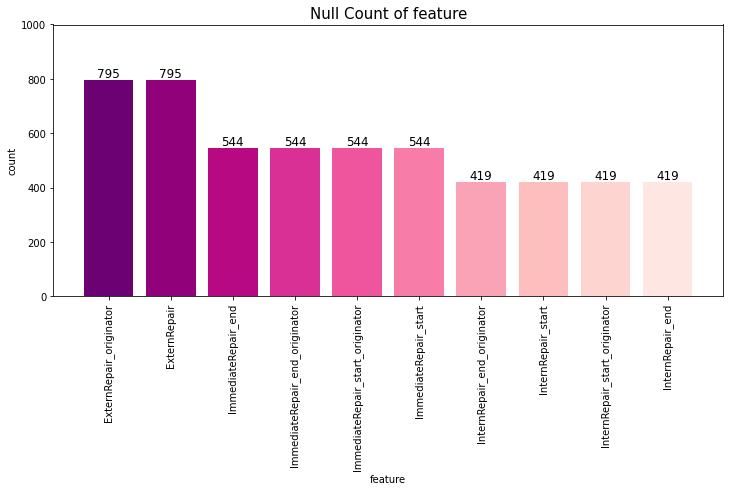

In [122]:
plt.figure(figsize = (12, 5))
bar = plt.bar(null_var.index, null_var['count'], color = sns.color_palette('RdPu_r',len(null_var.index)))
plt.ylim(0, 1000)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, '%d' % height, ha='center', va='bottom', size = 12)

plt.xlabel('feature')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.title("Null Count of feature", fontsize = 15)
plt.show()

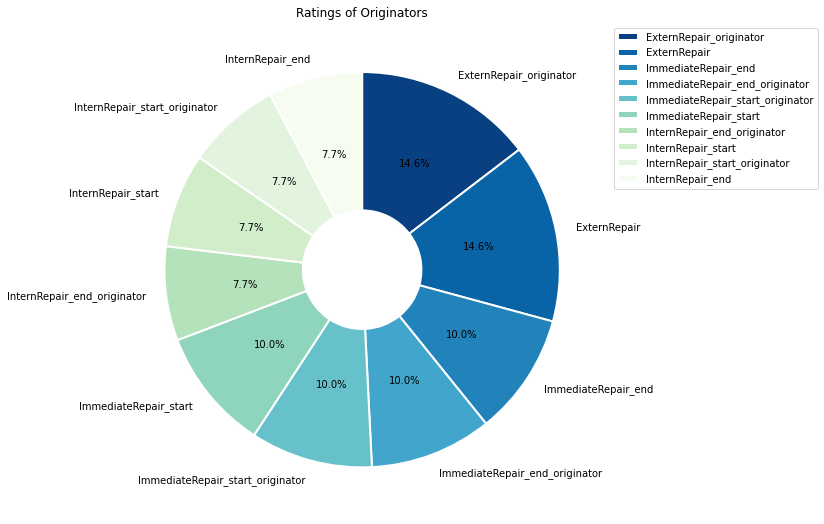

In [113]:
from matplotlib.gridspec import GridSpec

plt.figure(1, figsize=(40, 20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('GnBu_r')
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
colors = [cmap(i) for i in np.linspace(0, 1, len(null_var.index))]
plt.subplot(the_grid[0, 1], aspect=1, title = 'Ratings of Originators')
plt.pie(null_var['count'] / len(wrong_drop_df), labels = null_var.index, autopct='%.1f%%', colors = colors, startangle = 90, counterclock = False, wedgeprops = wedgeprops)
plt.legend(labels = null_var.index, bbox_to_anchor=(1, 1))
plt.show()